## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sn
import numpy as np

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [3]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [4]:
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
# Checking the number of mice.
unique_mice = merge_df['Mouse ID'].nunique()
unique_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = merge_df[merge_df[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Index for all entries with Mouse ID of g989

ind_drop = merge_df[merge_df['Mouse ID'].apply(lambda x: x.startswith('g989'))].index
ind_drop

Int64Index([860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872], dtype='int64')

In [9]:
# Drop all Indexes for Mouse ID of g989
clean_df = merge_df.drop(ind_drop)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [10]:
# Checking the number of mice in the clean DataFrame.

unique_mice = clean_df['Mouse ID'].nunique()
unique_mice

248

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [13]:
renamed_df = clean_df.rename(columns={"Tumor Volume (mm3)":"Tumor_Volume_mm3", 'Drug Regimen':'Drug_Regimen', 'Mouse ID':'Mouse_ID', 'Metastatic Sites':'Metastatic_Sites', 'Weight (g)':'Weight_g'})
renamed_df.head()

,Mouse_ID,Timepoint,Tumor_Volume_mm3,Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_g
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [14]:
tumor_regimen = clean_df.groupby("Drug Regimen").size()
tumor_regimen

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [15]:
tumor_mean = round((renamed_df.groupby("Drug_Regimen").Tumor_Volume_mm3.mean()),2)
tumor_mean

Drug_Regimen
Capomulin    40.68
Ceftamin     52.59
Infubinol    52.88
Ketapril     55.24
Naftisol     54.33
Placebo      54.03
Propriva     52.32
Ramicane     40.22
Stelasyn     54.23
Zoniferol    53.24
Name: Tumor_Volume_mm3, dtype: float64

In [16]:
tumor_median = round((renamed_df.groupby("Drug_Regimen").Tumor_Volume_mm3.median()),2)
tumor_median

Drug_Regimen
Capomulin    41.56
Ceftamin     51.78
Infubinol    51.82
Ketapril     53.70
Naftisol     52.51
Placebo      52.29
Propriva     50.45
Ramicane     40.67
Stelasyn     52.43
Zoniferol    51.82
Name: Tumor_Volume_mm3, dtype: float64

In [17]:
tumor_var = round((renamed_df.groupby("Drug_Regimen").Tumor_Volume_mm3.var()),2)
tumor_var

Drug_Regimen
Capomulin    24.95
Ceftamin     39.29
Infubinol    43.13
Ketapril     68.55
Naftisol     66.17
Placebo      61.17
Propriva     43.85
Ramicane     23.49
Stelasyn     59.45
Zoniferol    48.53
Name: Tumor_Volume_mm3, dtype: float64

In [18]:
tumor_std = round((renamed_df.groupby("Drug_Regimen").Tumor_Volume_mm3.std()),2)
tumor_std

Drug_Regimen
Capomulin    4.99
Ceftamin     6.27
Infubinol    6.57
Ketapril     8.28
Naftisol     8.13
Placebo      7.82
Propriva     6.62
Ramicane     4.85
Stelasyn     7.71
Zoniferol    6.97
Name: Tumor_Volume_mm3, dtype: float64

In [19]:
tumor_sem = round((renamed_df.groupby("Drug_Regimen").Tumor_Volume_mm3.sem()),2)
tumor_sem

Drug_Regimen
Capomulin    0.33
Ceftamin     0.47
Infubinol    0.49
Ketapril     0.60
Naftisol     0.60
Placebo      0.58
Propriva     0.54
Ramicane     0.32
Stelasyn     0.57
Zoniferol    0.52
Name: Tumor_Volume_mm3, dtype: float64

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Tumor_analysis_summ = pd.DataFrame([tumor_mean, tumor_median, tumor_var, tumor_std, tumor_sem]).T
Tumor_analysis_summ.columns = ["Average Tumor Size", "Median Tumor Size", "Tumor Variance", "Tumor Standard Deviation", "Tumor SEM"]
Tumor_analysis_summ


,Average Tumor Size,Median Tumor Size,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug_Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [21]:
count_drugs = renamed_df.groupby('Drug_Regimen')['Mouse_ID'].nunique().reset_index()

count_drugs

,Drug_Regimen,Mouse_ID
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ceftamin'),
 Text(2, 0, 'Infubinol'),
 Text(3, 0, 'Ketapril'),
 Text(4, 0, 'Naftisol'),
 Text(5, 0, 'Placebo'),
 Text(6, 0, 'Propriva'),
 Text(7, 0, 'Ramicane'),
 Text(8, 0, 'Stelasyn'),
 Text(9, 0, 'Zoniferol')]

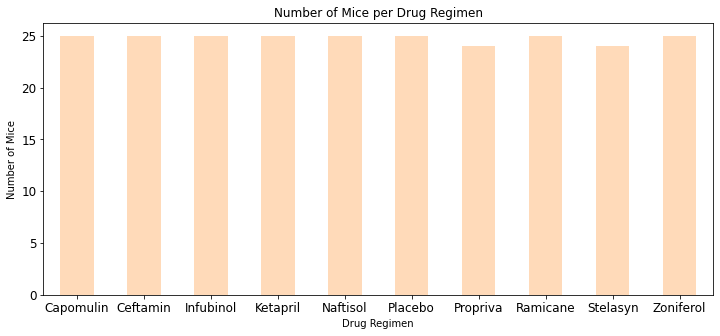

In [22]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = count_drugs.plot(kind="bar", figsize=(12, 5), legend=False, title='Number of Mice per Drug Regimen', fontsize=12, color="peachpuff",xlabel="Drug Regimen", ylabel='Number of Mice')

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(count_drugs["Drug_Regimen"], rotation=0)

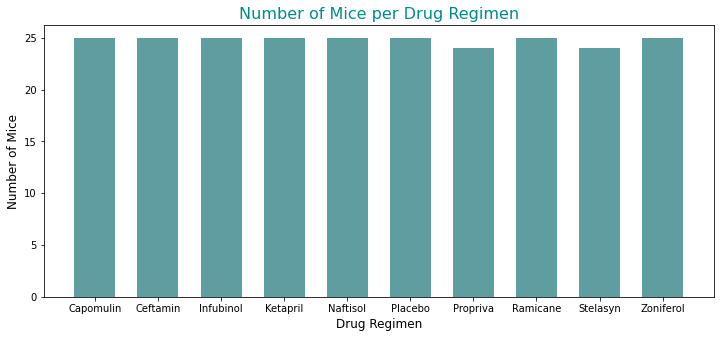

In [23]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.figure(figsize=(12,5))
plt.bar(count_drugs['Drug_Regimen'],count_drugs.Mouse_ID, color= "cadetblue", width=.65)

# Give teh chart a title, x label, and y label
plt.title('Number of Mice per Drug Regimen', fontsize=16, color='darkcyan')
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Mice', fontsize=12)

plt.show()

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [25]:
mouse_sex = clean_df.groupby("Sex").size()
mouse_sex

Sex
Female    922
Male      958
dtype: int64

(-1.1272585351526156,
 1.1101410553673794,
 -1.1104295916068467,
 1.1228276690280699)

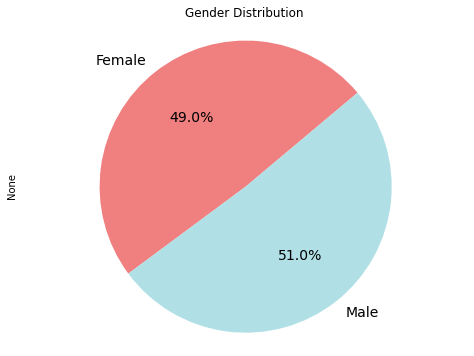

In [26]:

multi_plot = mouse_sex.plot(kind="pie", colors=['lightcoral', 'powderblue'],figsize=(8, 6), legend=False, title='Gender Distribution', fontsize=14, autopct="%1.1f%%", startangle=40)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [28]:
# Start by getting the last (greatest) timepoint for each mouse

timepoint_max = renamed_df.groupby(["Mouse_ID", "Drug_Regimen"]).Timepoint.max().reset_index()
timepoint_max.head()


,Mouse_ID,Drug_Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
2,a262,Placebo,45
3,a275,Ceftamin,45
4,a366,Stelasyn,30


In [29]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timpoint_merge = pd.merge(timepoint_max, renamed_df, on=["Mouse_ID", 'Timepoint', "Drug_Regimen"])
timpoint_merge.head()


,Mouse_ID,Drug_Regimen,Timepoint,Tumor_Volume_mm3,Metastatic_Sites,Sex,Age_months,Weight_g
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a262,Placebo,45,70.717621,4,Female,17,29
3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,a366,Stelasyn,30,63.440686,1,Female,16,29


In [30]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_vol = timpoint_merge.loc[timpoint_merge['Drug_Regimen'] == treatment]
    
    # add subset 
    final_vol = drug_vol.loc[drug_vol['Timepoint'] == drug_vol['Timepoint']]
    
    #create a series that lists all final tumor values
    values = final_vol['Tumor_Volume_mm3']
    tumor_vol.append(values)
    

    # Determine outliers using upper and lower bounds
    
    quartiles = values.quantile([.25, .5, .75])
    lower = quartiles[.25]
    upper= quartiles[.75]
    iqr = upper - lower
    
    #upper and lower bounds
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
   
    #Check for ouliers
    outliers_count = (values.loc[(final_vol['Tumor_Volume_mm3'] >= upper_bound) |
                                (final_vol['Tumor_Volume_mm3'] <= lower_bound)]).count()
    
    print(f'{treatment} Lower Bound: {lower_bound}')
    print(f'{treatment} Upper Bound: {upper_bound}')
    print(f'{treatment} number of outlier: {outliers_count}')
    


Capomulin Lower Bound: 20.70456164999999
Capomulin Upper Bound: 51.83201549
Capomulin number of outlier: 0
Ramicane Lower Bound: 17.912664470000003
Ramicane Upper Bound: 54.30681135
Ramicane number of outlier: 0
Infubinol Lower Bound: 36.83290494999999
Infubinol Upper Bound: 82.74144559000001
Infubinol number of outlier: 1
Ceftamin Lower Bound: 25.355449580000002
Ceftamin Upper Bound: 87.66645829999999
Ceftamin number of outlier: 0


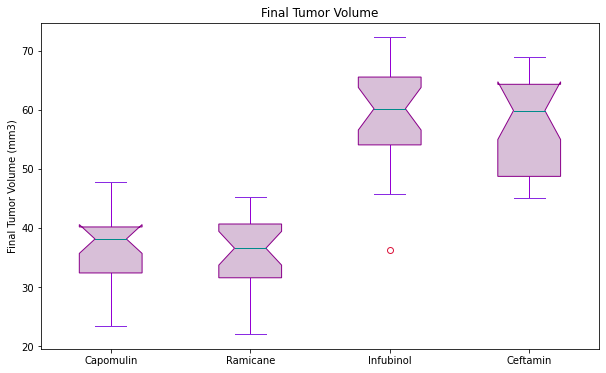

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.figure(figsize= (10,6))
plt.boxplot(tumor_vol, positions=[1,2,3,4], notch=True, patch_artist=True,
            boxprops=dict(facecolor='thistle', color='darkmagenta'),
            capprops=dict(color='blueviolet'),
            whiskerprops=dict(color='darkviolet'),
            flierprops=dict(color='crimson', markeredgecolor='crimson'),
            medianprops=dict(color='darkcyan'),
            )

plt.title('Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumer_line = renamed_df.loc[renamed_df["Mouse_ID"] == "c458",:]
tumer_line.head()


,Mouse_ID,Timepoint,Tumor_Volume_mm3,Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_g
436,c458,0,45.000000,0,Ramicane,Female,23,20
437,c458,5,45.722279,0,Ramicane,Female,23,20
438,c458,10,44.454378,1,Ramicane,Female,23,20
439,c458,15,45.107423,2,Ramicane,Female,23,20
440,c458,20,39.505135,2,Ramicane,Female,23,20


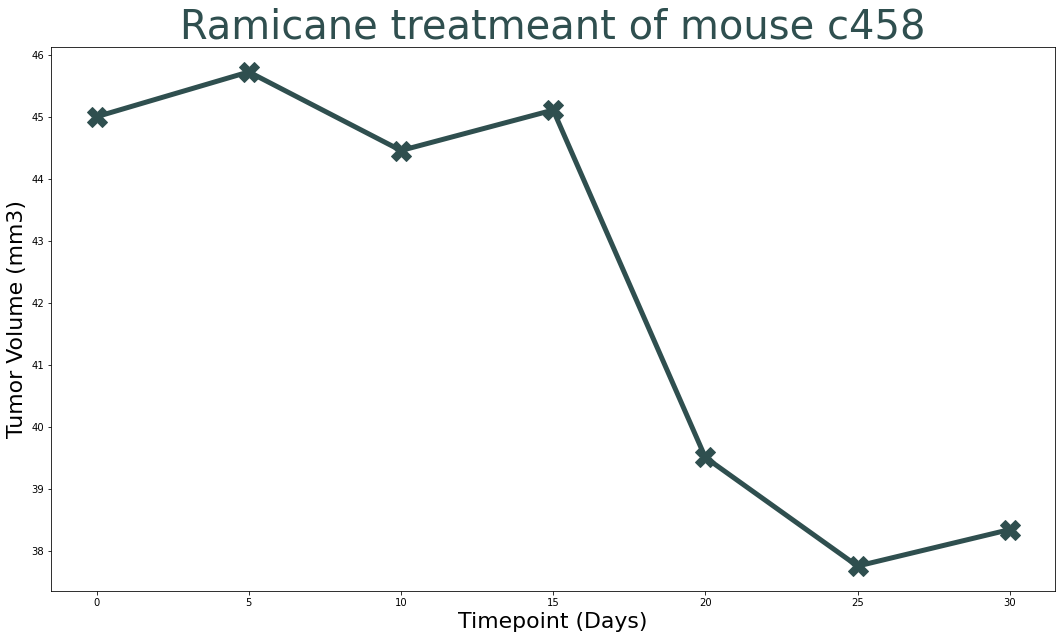

In [33]:
x_axis = tumer_line["Timepoint"]
y_axis = tumer_line["Tumor_Volume_mm3"]

fig1, ax1 = plt.subplots(figsize=(18, 10))
plt.title('Ramicane treatmeant of mouse c458',fontsize =40, color="darkslategrey")
plt.plot(x_axis, y_axis,linewidth=5, markersize=20,marker="X",color="darkslategray")
plt.xlabel('Timepoint (Days)',fontsize =22)
plt.ylabel('Tumor Volume (mm3)',fontsize =22)
plt.show()


In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [35]:
capomulin_df = renamed_df.loc[renamed_df['Drug_Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse_ID,Timepoint,Tumor_Volume_mm3,Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_g
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [36]:
#Find Average Tumor volume for each mouse
avg_Capomulin_weight = pd.DataFrame(capomulin_df.groupby('Mouse_ID')['Weight_g'].mean()).reset_index()
avg_Capomulin_weight.head()


,Mouse_ID,Weight_g
0,b128,22
1,b742,21
2,f966,17
3,g288,19
4,g316,22


In [37]:
avg_Capomulin_tumor = pd.DataFrame(capomulin_df.groupby('Mouse_ID')['Tumor_Volume_mm3'].mean()).reset_index()
avg_Capomulin_tumor.head()

,Mouse_ID,Tumor_Volume_mm3
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344


In [38]:
Capomulin_merge = pd.merge(avg_Capomulin_tumor, avg_Capomulin_weight, on=["Mouse_ID"])
Capomulin_merge.head()


,Mouse_ID,Tumor_Volume_mm3,Weight_g
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22


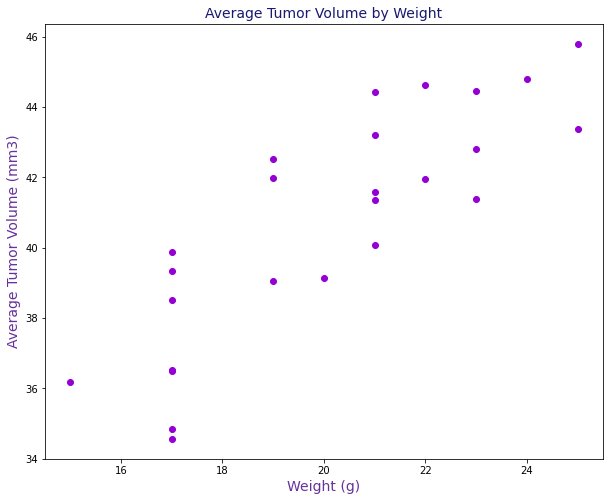

In [39]:
x_data = Capomulin_merge["Weight_g"]
y_data = Capomulin_merge['Tumor_Volume_mm3']

fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_data, y_data, color='darkviolet')
plt.xlabel("Weight (g)", fontsize =14, color="rebeccapurple")
plt.ylabel("Average Tumor Volume (mm3)", fontsize =14, color="rebeccapurple")
plt.title('Average Tumor Volume by Weight', fontsize =14, color="midnightblue")
plt.show()

## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [41]:
# Dataframe for Capomulin
capomulin_df = renamed_df.loc[renamed_df['Drug_Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse_ID,Timepoint,Tumor_Volume_mm3,Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_g
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [42]:
capomulin_df.describe()

,Timepoint,Tumor_Volume_mm3,Metastatic_Sites,Age_months,Weight_g
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,21.565217,40.675741,0.713043,13.456522,19.965217
std,14.384994,4.994774,0.848993,7.721423,2.732404
min,0.000000,23.343598,0.000000,1.000000,15.000000
25%,10.000000,37.685933,0.000000,7.000000,17.000000
50%,20.000000,41.557809,0.000000,16.500000,20.500000
75%,35.000000,45.000000,1.000000,20.000000,22.000000
max,45.000000,48.158209,3.000000,24.000000,25.000000


In [43]:
vol_df = pd.DataFrame(capomulin_df.groupby('Mouse_ID')['Tumor_Volume_mm3'].mean()).reset_index().rename(columns={'Tumor_Volume_mm3': 'Avg_Tumor_Volume'})
vol_df.head()

,Mouse_ID,Avg_Tumor_Volume
0,b128,41.963636
1,b742,40.083699
2,f966,36.505973
3,g288,41.990097
4,g316,44.613344


In [44]:
avg_vol_df = pd.merge(capomulin_df, vol_df, on='Mouse_ID')
avg_vol_df = avg_vol_df[['Weight_g', 'Avg_Tumor_Volume']].drop_duplicates()
avg_vol_df.head()

,Weight_g,Avg_Tumor_Volume
0,22,41.963636
10,21,43.216925
18,17,36.509212
28,17,34.559143
38,21,40.083699


In [45]:
x_data = avg_vol_df['Weight_g']
y_data = avg_vol_df['Avg_Tumor_Volume']

In [46]:
regression_df = pd.merge(vol_df, avg_vol_df)
regression_df.head()

,Mouse_ID,Avg_Tumor_Volume,Weight_g
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22


In [47]:
corrs = regression_df.corr()
corrs

,Avg_Tumor_Volume,Weight_g
Avg_Tumor_Volume,1.000000,0.841936
Weight_g,0.841936,1.000000


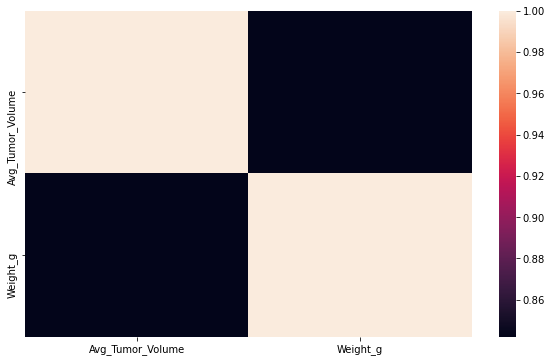

In [48]:
plt.figure(figsize=(10,6))
sn.heatmap(corrs)
plt.show()

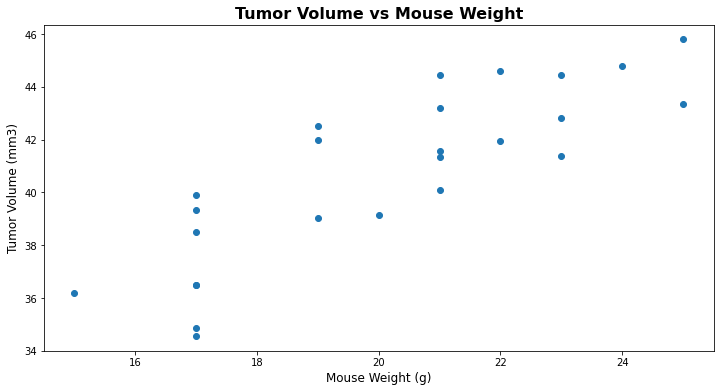

In [49]:
plt.figure(figsize=(12,6))

plt.scatter(regression_df.Weight_g, regression_df.Avg_Tumor_Volume)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.xlabel("Mouse Weight (g)", fontsize=12)
plt.title("Tumor Volume vs Mouse Weight", weight='bold', fontsize=16)

plt.show()

In [50]:
feature = renamed_df[["Weight_g"]]
target = renamed_df["Tumor_Volume_mm3"]

In [51]:
 # STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Tumor_Volume_mm3   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     993.1
Date:                Sat, 14 Aug 2021   Prob (F-statistic):          2.45e-175
Time:                        23:39:31   Log-Likelihood:                -6380.9
No. Observations:                1880   AIC:                         1.277e+04
Df Residuals:                    1878   BIC:                         1.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2483      1.098     14.805      0.000      14.096      18.401
Weight_g       1.3323      0.042     31.513      0.000       1.249       1.415
==============================================================================
Omnibus:                      155.092   Durbin-Watson:                   0.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.736
Skew:                           0.780   Prob(JB):                     8.53e-43
Kurtosis:                       3.191   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
results.mse_resid 

52.004843549732165

The r-squared is: 0.34589397060509264


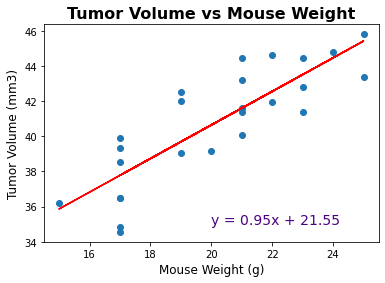

In [53]:
 # make plot

slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)
plt.scatter(x_data, y_data)

plt.plot(x_data, regress_values, "r-")

plt.annotate(line_eq,(20,35), fontsize=14,color="indigo")

plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.xlabel("Mouse Weight (g)", fontsize=12)
plt.title("Tumor Volume vs Mouse Weight", weight='bold', fontsize=16)

print(f"The r-squared is: {results.rsquared}")
plt.show()

In [54]:
results.fittedvalues

0       45.558935
1       45.558935
2       45.558935
3       45.558935
4       45.558935
          ...    
1888    38.897437
1889    38.897437
1890    38.897437
1891    38.897437
1892    38.897437
Length: 1880, dtype: float64

In [55]:
np.mean((renamed_df.Weight_g - results.fittedvalues) ** 2)

615.5188447165905